In [44]:
import sys
sys.path.append('../')

import pandas as pd

from easytex import *

# Create Document Container

In [45]:
# Declare Preamble
preamble = Preamble(author='', date='\\today', title='easytex')

# Create Document using declared Preamble
document = Document(
    preamble=preamble, 
    include_title=True, 
    table_of_contents=True, 
    list_of_figures=True, 
    list_of_tables=True,
    cover_page=True
)

# Create a pagestyle (This only sets headers and footers currently)
page_style = PageStyle(
    lhead='easytex',
    rhead='\\today',
    lfoot='ReadMe',
    rfoot='Built using easytex'
)

# Add PageStyle to document
document.add(page_style)

document.add_clearpage()

# Introduction

In [46]:
document.add_clearpage()

introduction = Section('Introduction', link_target='toc', level=1)


introduction.add(Text("""
The easytex library is intended to serve as easy-to-use python-to-latex API interface.
Rather then having to know exactly what latex commands to use, the intention is for easytex to do the heavy lifting for you.
The easytex library is currently organzied into 8 classes:tex
"""))

list_items = {
    'Preamble': 1,
    'Document': 1,
    'Text': 1,
    'Table': 1,
    'Figure': 1,
    'Section': 1,
    'Environment': 1,
    'PageStyle': 1
}

introduction.add(
    Text(list_items)
)

introduction.add(
    Text("""

Each of these classes, and their uses are documented in the following sections.

The easytex library can be loaded simply by running:
""")
)


introduction.add(
    Text("from easytex import *", verbatim=True)
)

document.add(
    introduction
)

# Preamble

In [47]:
document.add_clearpage()

preamble_sect = Section('Preamble', link_target='toc', level=1)


preamble_sect.add(
    Text("""
The preamble section contains all the necessary setup information for latex to render a document.
The Document class (covered later) requires a Preamble object upon declaration, which means making a preamble should be the first step when creating a new document.
By default, the Preamble() class loads a default preamble.
The only values a user is required to pass pertain to document meta-inforamation including: 1) Title, 2) Author, 3) Date, and 4) font.
Note that the font passed is document-wide.

The Preamble class accepts the following arguments:
""")
)

list_items = {
    'tex: str': 1,
    'Can pass a custom preamble here.': 2,
    'font: str': 1,
    'Name of font to use with the document.': 2,
    'title: str': 1,
    'Title of the report.': 2,
    'author: str': 1,
    'Author(s) of the report.': 2,
    'date: str': 1,
    'String representing the date to appear on the document.': 2
}

preamble_sect.add(
    Text(list_items)
)


preamble_examples = Section('Example Usage', link_target='toc', level=2)

preamble_examples.add(
    Text("""
preamble = Preamble(author='', date='\\today', title='easytex', font='Lato')
""", verbatim=True)
)

preamble_sect.add(preamble_examples)

document.add(preamble_sect)

# Document

In [48]:
document.add_clearpage()

document_sect = Section('Document', link_target='toc', level=1)
# document_sect.add_section('Document')

# Document Section
document_sect.add(
    Text("""
The Document class represents the full latex document.
A Document object requires a preamble object upon initialization.
By default, a new latex document always includes the provided title, a table of contents, a list of figures and a list tables.
These can all be disabled when creating a new Document object.

The document class, like all provided classes as part of the easytex library, includes a .add() function.
This function represents the intended way to combine the different report parts (such as text, tables and figures) together into a cohesive document.
A typical workflow follows the pattern: 1) Create Preamble, 2) Create Document (using Preamble), 3) Create Content, 4) Add content to Document, 5) Repeat 3 & 4 untill finished.

The Document class accepts the following arguments:
""")
)

list_items = {
    'preamble: Preamble': 1,
    'A Preamble object.': 2,
    'include_title: bool': 1,
    'Name of font to use with the document.': 2,
    'table_of_contents: bool': 1,
    'True: Include a table of contents.': 2,
    'False: Do not include a table of contents.': 2,
    'list_of_figures: bool': 1,
    'True: Include a list of figures.': 2,
    'False: Do not include a list of figures.': 2,
    'list_of_tables: bools': 1,
    'True: Include a list of tables.': 2,
    'False: Do not include a list of tables.': 2
}

document_sect.add(
    Text(list_items)
)

# Methods subsection
methods_sect = Section('Important Methods', link_target='toc', level=2)

methods_sect.add(
    Text("""
Some important methods belonging to the Document class include:
""")
)

list_items = {
    'add_clearpage(self)': 1,
    'Adds a clearpage command at the current document location.': 2,
    'export_tex(self, file)': 1,
    'Exports the documents tex commands to file.': 2,
    'render_report(self, destination)': 1,
    'Calls export_tex and then compiles the tex file using xelatex.': 2,
    'print_map(self)': 1,
    'Prints an outline view of the current document.': 2
}

methods_sect.add(
    Text(list_items)
)

# Example subsection
document_examples = Section('Example Usage', link_target='toc', level=2)

document_examples.add(Text("Example creating a document, adding a section, exporting the tex, and then rendering the pdf:", verbatim=True))

document_examples.add(
    Text("""
# Create a new document:
document = Document(
    preamble=preamble,
    include_title=True, 
    table_of_contents=True, 
    list_of_figures=True, 
    list_of_tables=True
)

# Add a Section object named 'section':
document.add(section)

# Render the document:
document.render_report('rendered_report_name.pdf')

# Note: The rendered report will be saved under 'rendered_report_name.pdf'
""", verbatim=True)
)

document_sect.add(methods_sect)

document_sect.add(document_examples)

document.add(document_sect)

# Text

In [49]:
document.add_clearpage()

text_sect = Section('Text', link_target='toc', level=1)

text_sect.add(
    Text("""
This class represents a latex text.

The Text class accepts the following arguments:
"""))

list_items = {
    'text: str / dict': 1,
    'Passed text will be treated as plain text for a latex document, or as a list of a dictionry is passed.': 2,
    'When passing a dictionary, the keys should be the list text, and the values correspond to the list level.': 2,
    "Example: dict('here is a list entry': 1)": 2,
    'verbatim: bool': 1,
    'If true, inserts text verbatim (as-is).': 2,
    'Useful for codeblocks.': 2
}

text_sect.add(
    Text(list_items)
)

methods_sect = Section('Important Methods', link_target='toc', level=2)

methods_sect.add(
    Text("""
Some important methods belonging to the Text class include:
""")
)

list_items = {
    'add_list(self, list_items, bullets=False)': 1,
    'Creates a list from list_items.': 2,
    'If bullets=False, then bullets will be numeric.': 2,
    'add_bold(self, text)': 1,
    'Inserts bolded text.': 2
}

methods_sect.add(Text(list_items))

text_examples = Section('Example Usage', link_target='toc', level=2)

text_examples.add(
    Text("Creating a list:")
)

text_examples.add(
    Text("""
# Create list dictionary
# The numeric corresponds to the list level; '1' is the top level
# '2' is a sub bullet, and so on.

dict_ = {
    'add_list(self, list_items, bullets=False)': 1,
    'Creates a list from list_items.': 2,
    'If bullets=False, then bullets will be numeric.': 2,
    'add_verbatim(self, text)': 1,
    'Inserts text verbatim or as-is.': 2,
    'Useful for codeblocks.': 2,
    'add_bold(self, text)': 1,
    'Inserts bolded text.': 2
}

# Create a latex list using the Text() class from the above dict:
list_ = Text(dict_)
""", verbatim=True)
)

text_sect.add(methods_sect)

text_sect.add(text_examples)

document.add(text_sect)

# Table

In [50]:
document.add_clearpage()

table_sect = Section('Table', link_target='toc')

table_sect.add(
    Text("""
This class represents a latex table.
A Table object can be initialized in a number of ways, but by far the easiest is to pass a pandas DataFrame.
While pandas includes a ~.to_latex() function, this can be severly limiting if one wants to change anything having to do with a particular table's style.
The Table class provides a number of style arguments, including: row-lines, row highlighting, longtables and landscape tables, and zebra stripping.

The Table class is configured to create a minimalist table by default.

The Table class accepts the following arguments:
""")
)

list_items = {
    "table_type: str": 1,
    "Must be `table', `tabular', `longtable', or `sidewaystable'": 2,
    "Designates the type of tabular environment used.": 2,
    "label: str": 1,
    "A string represnting the table's cross reference label": 2,
    "data: pd.DataFrame or list": 1,
    "A pandas dataframe or list object to convert into a latex table.": 2,
    "cols: list": 1,
    "List of column names. Used to generate an appropriately sized table.": 2,
    "caption: str": 1,
    "A string representing the table's caption.": 2,
    "captionof: str": 1,
    "A string representing the table's caption. To be used outside of a float environment.": 2,
    "empty_label: bool": 1,
    "A flag representing whether to use a blank caption.": 2,
    "alignment: str": 1,
    "A string representing a latex tabular alignment command.": 2,
    "Used to overwrite default alignment.": 2,
    "zebra: bool": 1,
    "Boolean representing whether the table should be zebra stripped or not.": 2,
    "row_colors: dict": 1,
    "Dictionary mapping row indexes to row color names."
    "mid_rule: bool": 1,
    "Boolean representing whether the table should have midrules between rows.": 2,
    "mid_rule_color: str": 1,
    "The color name the table's midrule lines should be.": 2,
    "link_target: str": 1,
    "A string representing an href anchor label the figure should link to.": 2,
}

table_sect.add(
    Text(list_items)
)


methods_sect = Section('Important Methods', link_target='toc', level=2)
# methods_sect.add_subsection('Important Methods')

methods_sect.add(
    Text("""
The Table class was designed to be fully initialized without the neeed of calling additional methods.

To that end, a Table object can be fully constructed by providing only three pieces of information: 1) a pandas dataframe, 2) a cross reference label, and 3) the type of table to create.

Certain use-cases may necessitate creating an ad-hoc table (such as for aligning document elements in non-standard ways) that would benefit fromt he use of the underlying method calls within the Table class.
This type of functionality is still being developed.

A notable external function, however, is make_row_colors_dict():
""")
)

list_items = {
    'make_row_colors_dict(df, in_values, column=None, color=None)': 1,
    'df: pd.dataframe': 2,
    'The pandas dataframe to be colored': 3,
    'column: str': 2,
    'The column name to be used for conditional highlighting': 3,
    'in_values: list or pd.Series': 2,
    'The list of values to search column for, OR a boolean pandas series.': 3,
    'color: str': 2,
    'A latex interpretable color string (a colorname or colorname!value)': 3,
}

methods_sect.add(
    Text(list_items)
)

table_examples = Section('Example Usage', link_target='toc', level=2)

# Create an example dataframe:
t = pd.DataFrame({'a': [1,2,3], 'b': [4,5,6]})

# Create a color dict to highlight col 'b' values greater than 5:
color_filter = t['b'] > 5
row_colors = make_row_colors_dict(df=t, in_values=color_filter, color='red!25')

# Create the final table

table = Table(
    data=t,
    row_colors=row_colors,
    table_type='table',
    label='colored_table',
    caption='Result',
    link_target='lot'
)

table_examples.add(
    Text("Creating a table:")
)

table_examples.add(
    Text("""
# Create an example dataframe:
t = pd.DataFrame({'a': [1,2,3], 'b': [4,5,6]})

# Create a color dict to highlight col 'b' values greater than 5:
color_filter = t['b'] > 5
row_colors = make_row_colors_dict(df=t, in_values=color_filter, color='red!25')

# Create the final table

table = Table(
    data=t,
    row_colors=row_colors,
    table_type='table',
    label='colored_table',
    caption='Result',
    link_target='lot'
)

# Multi-Index Table Example:
arrays = [
    ['Colors', 'Colors', 'Colors', 'Fruit', 'Fruit', 'Fruit', '&Meat', '&Meat'],
    ['red', 'red', 'blue', 'apple', 'apple', 'grape', 'chicken', 'chicken'],
    ['Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N']
]

tuples = list(zip(*arrays))

tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Category', 'Item', 'Flag'])

data = pd.DataFrame({'A': np.random.randn(8), 'B': np.random.randn(8), 'C': np.random.randn(8)}, index=index)

d = data.T
d.index.name = 'rows'

x = pd.DataFrame(columns=d.columns, index=data.index)

""", verbatim=True)
)

table_examples.add(table)

table_sect.add(methods_sect)

table_sect.add(table_examples)

document.add(table_sect)

# Figure

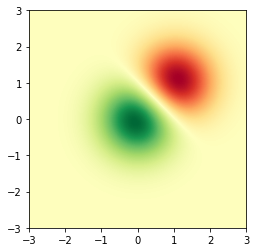

In [51]:
document.add_clearpage()

figure_sect = Section('Figure', link_target='toc', level=1)

figure_sect.add(
    Text("""
This class represents a latex Figure.

A Figure object an be initialized in one of two ways: 1) A matplotlib.Figure can be passed, or 2) a filepath pointing to a figure may be passed.
Figures are placed into non-floating mini-pages by default.
This means that figures will always appear in-line in the order they were added to the document.

If a matplotlib.Figure is used to create a LatexPart.Figure object, then a copy of the figure will be automatically exported and saved to a local pdf.
This is necessary for the latex compiler to be able to add the image when the document is ultimately rendered.

The Figure class accepts the following arguments:
""")
)

list_items = {
    " label: str": 1,
    "A string the figures label - used to cross-reference.": 2,
    "figure: obj": 1,
    "An object representing the figure being added": 2,
    "max_height: float": 1,
    "A float representing the proportion of max text height the figure can be.": 2,
    "max_width: float": 1,
    "A float representing the proportion of max text width the figure can be.": 2,
    "graphics_path: str": 1,
    "A string representing the path to a saved figure (if needed).": 2,
    "Does not include the filename.": 2,
    "caption: str": 1,
    "String representing the caption to be used with the Figure.": 2,
    "empty_label: bool": 1,
    "A flag used to track whether caption should be empty or not.": 2,
    "link_target: str": 1,
    "A string representing an internal href anchor label.": 2,
    "Used to link back to table of contents, lists of figures and lists of tables.": 2
}

figure_sect.add(
    Text(list_items)
)

figure_examples = Section('Example Usage', link_target='toc', level=2)

# Create Example Figure:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

# Create the final Figure
figure = Figure(
    figure=fig,
    label='figure_label',
    caption='Here is a caption',
    link_target='lof'
)

figure_examples.add(
    Text("Creating a figure:")
)

figure_examples.add(
    Text("""
# Create Example Figure:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

# Create the final Figure
figure = Figure(
    figure=fig,
    label='figure_label',
    caption='Here is a caption',
    link_target='lof'
)
""", verbatim=True)
)

figure_examples.add(figure)

figure_sect.add(figure_examples)

document.add(figure_sect)

# Section

In [52]:
document.add_clearpage()

section_sect = Section('Section', link_target='toc', level=1)
# section_sect.add_section('Section')

section_sect.add(Text("""
This class represents a latex Section.

Sections are a common way to organize information within a document.

Currently, the Section class supports Sections, sub-sections, and sub-sub-sections.

The Section class accepts the following arguments:
""")
)

list_items = {
    "child: LatexPart": 1,
    "A latexPart to be contained within the section.": 2,
    "link_target: str": 1,
    "A string signifying a cross-reference label to link the section to.": 2,
    "Default labels include:": 2,
    "toc (table of contents)": 3,
    "lof (list of figures)": 3,
    "lot (list of tables)": 3
}

section_sect.add(
    Text(list_items)
)

section_examples = Section('Example Usage', level=2, link_target='toc')

section_examples.add(
    Text(
"""# Create a Section
section = Section(
    'This is the section name',
    level=1,
    link_target='toc'
)

# Add some content to the section:
section.add(Text('Here is some text that goes into the section.'))
""", verbatim=True)
)
    
section_sect.add(section_examples)

document.add(section_sect)

# Environment

In [53]:
document.add_clearpage()

environment_sect = Section('Environment', link_target='toc', level=1)
environment_sect.add(Text("""
This class represents a latex environment.

Environments are used to change the layout of parts of a latex document.
For example, centering elements such as text, figures and tables can be done using environments.

Environments are treated as 'containers' - that is that they contain or encapsulate other report objects.
To encapsulate a latex element - for example a table - in an environment, simply pass the latex element as the solo argument to an Environment.
Once an environment has been declared, additional method calls are used to 'add' the desired enviornments.

Currently, the Environment class supports minipages, landscapes, adjustboxes and centering environments.

The syntax flow is as follows:
Create latex element -> add element to environment -> add specific environment behavior.

The Environment class accepts the following arguments:
""")
)

list_items = {
    "child: LatexPart": 1,
    "A latexPart to be contained within the Environment.": 2,
}

environment_sect.add(
    Text(list_items)
)

environment_example = Section('Example Usage', link_target='toc', level=2)
environment_example.add(Text("""
# Example table:

text = Text(
    'repeat this text' * 5
)

# Declare an environment encapsulating the table from above:
environment = Environment(text)

# Add a centering environment:
environment.add_centering()

""", verbatim=True)
)

text = Text(
    'repeat this text' * 5
)

# Declare an environment encapsulating the table from above:
environment = Environment(text)

# Add a centering environment:
environment.add_centering()

environment_example.add(environment)

environment_sect.add(environment_example)

document.add(environment_sect)

# Columns

In [54]:
document.add_clearpage()

columns_sect = Section('Columns', link_target='toc', level=1)
columns_sect.add(Text("""
This class is used to create newspaper-like column layouts.
This class serves as a convenient way to ensure document elements appear next to eachother.

The column class accepts a single argument:
""")
)

list_items = {
    "arg: int / list": 1,
    "An int specifying the number of columns, or a list containing each columns' contents.": 2,
}

columns_sect.add(
    Text(list_items)
)

columns_example = Section('Example Usage', link_target='toc', level=2)
columns_example.add(Text("""
# Example:

# Make  Table
table = Table(
    data=pd.DataFrame({'A':[1,2,3], 'B':[3,4,5]}),
    table_type='tabular',
    label='example'
)

center_table = Environment(table)
center_table.add_centering()

# Create a Column object and fill column contents:
columns = Columns(3)
columns[0] = Figure(figure=fig, label='figure', max_width=1.0)
columns[1] = center_table
columns[2] = Text('some random text ' * 20)

or

columns = Columns([
    Figure(figure=fig, label='figure', max_width=1.0),
    center_table,
    Text('some random text ' * 20)
])
""", verbatim=True)
)

table = Table(
    data=pd.DataFrame({'A':[1,2,3], 'B':[3,4,5]}),
    table_type='tabular',
    label='example'
)

center_table = Environment(table)
center_table.add_centering()

# Create a Column object and fill column contents:
columns = Columns(3)
columns[0] = Figure(figure=fig, label='figure', max_width=1.0)
columns[1] = center_table
columns[2] = Text('some random text ' * 20)

columns_example.add(Text('\n\\clearpage\n'))

columns_example.add(columns)

columns_sect.add(columns_example)

document.add(columns_sect)

# PageStyle

In [55]:
# document.add_clearpage()

# pagestyle_sect = Section('PageStyle', link_target='toc', level=1)

# pagestyle_sect.add(Text("""
# This class represents a page style.

# Currently PageStyle only supporst headers and footers.

# The PageStyle class accepts the following arguments:
# """)
# )

# document.add(pagestyle_sect)

# Compile Document

In [56]:
document.render_report('readme.pdf')

In [57]:
document.export_tex()

In [58]:
document.print_map()

 1 PageStyle

        |
         `--| lhead: easytex
            | rhead: \today
            | lfoot: ReadMe
            | rfoot: Built using easytex
            
 2 LatexPart

        |
         `--| Contains: \clearpage...
            
 3 LatexPart

        |
         `--| Contains: \clearpage...
            
 4 Section

        |
         `--| Type: section
            | Name: Introduction
            
         1 Text

                |
                 `--| Contains: The easytex li...
            
         2 Text

                |
                 `--| Contains: \Activate\begin{easy...
            
         3 Text

                |
                 `--| Contains: Each of these classe...
            
         4 Text

                |
                 `--| Contains: \begin{verbatim}from...
            
 5 LatexPart

        |
         `--| Contains: \clearpage...
            
 6 Section

        |
         `--| Type: section
            | Name: Preamble
            
         1 Tex